# Audio Signal Visualization

In [105]:
import numpy as np
from scipy.io import wavfile
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors as mcolors
from matplotlib.collections import PolyCollection

%matplotlib inline

In [96]:
fs, sound_array = wavfile.read('1_nicolas_39.wav')

In [102]:
# get 10 ms windows
time_window = 0.010

# number of samples per window
samp_in_window = int(fs*time_window)

# size of resulting array
num_ffts = len(sound_array) // samp_in_window
fft_size = 64

# declare empty np array
spec_3d = np.empty(shape=(num_ffts, fft_size), dtype=np.float32)

# calc windowed ffts
for i in range(num_ffts):
    spec_3d[i] = abs(fft(sound_array[i*samp_in_window:(i+1)*samp_in_window],
                         n=fft_size))
# roll to center
spec_3d = np.roll(spec_3d, fft_size//2, axis=1)
    
spec_3d.shape

(34, 64)

## Heat Map

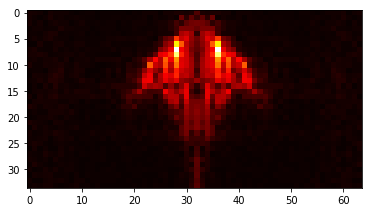

(34, 64)

In [100]:
# build plot
#plt.figure(figsize=(10))
plt.imshow(spec_3d, cmap='hot', interpolation='nearest')
plt.show()
spec_3d.shape

## 3D Frequency Magnitude

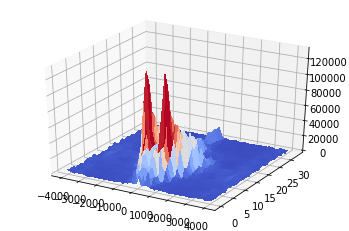

In [131]:
# build plot

fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.linspace(-fs/2,fs/2,fft_size)
Y = np.arange(spec_3d.shape[0])
X,Y = np.meshgrid(X,Y)
Z = spec_3d

surf = ax.plot_surface(X, Y, spec_3d, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()



## Frequency Magnitude vs. Phase

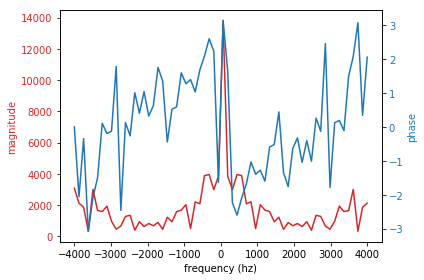

In [130]:
fourier = np.roll(fft(sound_array, fft_size), shift=fft_size//2)
x_axis = np.linspace(-fs/2,fs/2,fft_size)
mag = np.abs(fourier)
phs = np.angle(fourier)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('frequency (hz)')
ax1.set_ylabel('magnitude', color=color)
ax1.plot(x_axis, mag, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('phase', color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis, phs, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()